In [60]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Non-mixed Datatypes 

In [85]:
# Get data
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [183]:
np.array([train_features,]).shape

(1, 3154, 7)

In [185]:
np.array([train_labels,]).shape

(1, 3154)

In [211]:
# Separate features from labels 
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')
abalone_features = np.array(abalone_features)
abalone_features

# split training and testing 
train_features, test_features, train_labels, test_labels = train_test_split(abalone_features, abalone_labels, test_size=.01, random_state=1)

# Create dataset 
batch_size = 32

# This is equivalent to having a batch size of 1
#train_ds = tf.data.Dataset.from_tensor_slices(([[x,] for x in train_features], [[x,] for x in train_labels]))
#test_ds = tf.data.Dataset.from_tensor_slices(([[x,] for x in test_features], [[x,] for x in test_labels]))

train_ds = tf.data.Dataset.from_tensor_slices((train_features, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_features, test_labels))
train_ds = train_ds.batch(batch_size)
test_ds = test_ds.batch(batch_size)

# this is equivalent to having 1 batch (bad)
#train_ds = tf.data.Dataset.from_tensor_slices(([train_features,], [train_labels,]))
#test_ds = tf.data.Dataset.from_tensor_slices(([test_features,], [test_labels,]))

# visualize 
print(f"Total number of training data {len(abalone_features)}")
print(f"Training batches {len(train_ds)} of size {batch_size}")
print(f"Testing batches {len(test_ds)} of size {batch_size}")

Total number of training data 3320
Training batches 103 of size 32
Testing batches 2 of size 32


In [212]:
for feature, label in train_ds:
    print(feature)
    print(label)
    break

tf.Tensor(
[[0.405 0.305 0.105 0.362 0.157 0.07  0.125]
 [0.65  0.505 0.19  1.274 0.59  0.23  0.391]
 [0.485 0.4   0.135 0.663 0.313 0.137 0.2  ]
 [0.33  0.25  0.095 0.208 0.102 0.04  0.052]
 [0.47  0.365 0.1   0.411 0.175 0.086 0.135]
 [0.73  0.56  0.19  1.942 0.799 0.519 0.566]
 [0.67  0.545 0.175 1.707 0.7   0.387 0.575]
 [0.57  0.465 0.16  0.893 0.315 0.258 0.263]
 [0.61  0.495 0.185 1.109 0.37  0.314 0.33 ]
 [0.35  0.255 0.08  0.192 0.08  0.038 0.063]
 [0.52  0.425 0.165 0.989 0.396 0.225 0.32 ]
 [0.6   0.475 0.15  1.008 0.443 0.221 0.28 ]
 [0.58  0.44  0.175 1.226 0.54  0.271 0.327]
 [0.275 0.195 0.065 0.106 0.054 0.02  0.028]
 [0.64  0.51  0.175 1.368 0.515 0.266 0.57 ]
 [0.54  0.42  0.14  0.803 0.38  0.18  0.21 ]
 [0.61  0.48  0.19  1.296 0.521 0.323 0.365]
 [0.74  0.605 0.2   2.493 1.145 0.575 0.523]
 [0.61  0.485 0.17  1.022 0.419 0.24  0.36 ]
 [0.69  0.55  0.2   1.569 0.687 0.367 0.46 ]
 [0.235 0.175 0.065 0.061 0.021 0.02  0.019]
 [0.63  0.53  0.18  1.28  0.618 0.256 0.315]

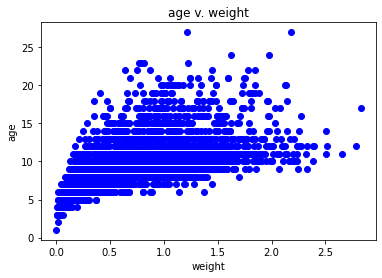

In [165]:
# view data
'''
for feature, label in train_ds:
    print(f"Feature {str(feature)} + label - {str(label)}")
'''

# Plot
# shucked weight vs age
for feature, label in train_ds: 
    plt.scatter(feature[3], label, color="blue")
plt.xlabel("weight")
plt.ylabel("age")
plt.title("age v. weight")
plt.show()

In [213]:
# regression model 
normalize = layers.Normalization()
normalize.adapt(abalone_features)
abalone_model = tf.keras.Sequential([
  normalize, 
  layers.Dense(64),
  layers.Dense(1)
])

abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

In [214]:
# train 
abalone_model.fit(train_ds, epochs=10, verbose=1)
#abalone_model.fit(abalone_features, abalone_labels, epochs=10, verbose=1)

Epoch 1/10
103/103 [==============================] - 0s 729us/step - loss: 94.2420
Epoch 2/10
103/103 [==============================] - 0s 693us/step - loss: 56.4097
Epoch 3/10
103/103 [==============================] - 0s 684us/step - loss: 18.5652
Epoch 4/10
103/103 [==============================] - 0s 680us/step - loss: 6.3305
Epoch 5/10
103/103 [==============================] - 0s 700us/step - loss: 5.1717
Epoch 6/10
103/103 [==============================] - 0s 774us/step - loss: 5.0404
Epoch 7/10
103/103 [==============================] - 0s 794us/step - loss: 4.9956
Epoch 8/10
103/103 [==============================] - 0s 854us/step - loss: 4.9750
Epoch 9/10
103/103 [==============================] - 0s 689us/step - loss: 4.9627
Epoch 10/10
103/103 [==============================] - 0s 732us/step - loss: 4.9533


In [215]:
# Evaluate
abalone_model.evaluate(test_ds)

2/2 [==============================] - 0s 2ms/step - loss: 3.7543


3.754281997680664

In [216]:
# Visualize 
for batch_feature, batch_label in test_ds:
    for feature, label in zip(batch_feature, batch_label):
        print(f"Predicted label: {abalone_model.predict(np.array([np.array(feature),])).flatten()[0]} actual label: {label}")


Predicted label: 10.44200325012207 actual label: 9
Predicted label: 10.136301040649414 actual label: 12
Predicted label: 10.64048957824707 actual label: 8
Predicted label: 10.18053150177002 actual label: 9
Predicted label: 8.55508804321289 actual label: 8
Predicted label: 10.282342910766602 actual label: 10
Predicted label: 7.5853657722473145 actual label: 6
Predicted label: 10.685802459716797 actual label: 11
Predicted label: 10.544822692871094 actual label: 11
Predicted label: 9.941275596618652 actual label: 9
Predicted label: 10.997572898864746 actual label: 10
Predicted label: 9.789473533630371 actual label: 7
Predicted label: 12.09975528717041 actual label: 10
Predicted label: 10.456380844116211 actual label: 10
Predicted label: 9.319207191467285 actual label: 10
Predicted label: 7.5354084968566895 actual label: 7
Predicted label: 11.17361068725586 actual label: 10
Predicted label: 12.493745803833008 actual label: 11
Predicted label: 7.067288875579834 actual label: 6
Predicted lab

# Mixed Datatypes 

In [217]:
# Get data
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [222]:
# Pop out labels 
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

# dtype to column name
inputs = {}

for name, column in titanic_features.items():
    dtype = column.dtype
    if dtype == object:
        dtype = tf.string
    else:
        dtype = tf.float32

    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

In [232]:
# run numeric inputs thorugh normalization layer 
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

preprocessed_inputs = [all_numeric_inputs]

In [236]:
# one-hot encoding
for name, input in inputs.items():
    if input.dtype == tf.float32:
        continue

    lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
    one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

    x = lookup(input)
    x = one_hot(x)
    preprocessed_inputs.append(x)

In [241]:
# combined preprocessed inputs
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)
titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)
tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [246]:
# Create dictionary
titanic_features_dict = {name: np.array(value) 
                         for name, value in titanic_features.items()}
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

In [253]:
# build model
def titanic_model(preprocessing_head, inputs):
    body = tf.keras.Sequential([ # Regression model 
        layers.Dense(64),
        layers.Dense(1)
    ])

    preprocessed_inputs = preprocessing_head(inputs) # Why? input is fed in 3 times why 
    result = body(preprocessed_inputs)
    model = tf.keras.Model(inputs, result)

    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                    optimizer=tf.keras.optimizers.Adam())
    return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

In [254]:
# train
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 1s 1ms/step - loss: 0.6611
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5393
Epoch 3/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4974
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4702
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4520
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4418
Epoch 7/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4331
Epoch 8/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4281
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4249
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4227


# Use Tf data

In [256]:
# Get data manually 
import itertools 

def slices(features):
    for i in itertools.count():
        # For each feature take index `i`
        example = {name:values[i] for name, values in features.items()}
        yield example

for example in slices(titanic_features_dict):
    for name, value in example.items():
        print(f"{name:19s}: {value}")
    break

{'sex': 'male', 'age': 22.0, 'n_siblings_spouses': 1, 'parch': 0, 'fare': 7.25, 'class': 'Third', 'deck': 'unknown', 'embark_town': 'Southampton', 'alone': 'n'}
sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


In [257]:
# Get data
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)
for example in features_ds:
    for name, value in example.items():
        print(f"{name:19s}: {value}")
    break

sex                : b'male'
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : b'Third'
deck               : b'unknown'
embark_town        : b'Southampton'
alone              : b'n'


In [259]:
# create ds 
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))

# batch 
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)

In [260]:
# train
titanic_model.fit(titanic_batches, epochs=5)

Epoch 1/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4231
Epoch 2/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4222
Epoch 3/5
20/20 [==============================] - 0s 3ms/step - loss: 0.4222
Epoch 4/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4198
Epoch 5/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4191


# From single file 

In [261]:
# get data
titanic_file_path = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")


40960/30874 [=======================================] - 0s 1us/step


In [262]:
# split data using tf.data
titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size=5, # Artificially small to make examples easier to show.
    label_name='survived',
    num_epochs=1,
    ignore_errors=True,)

for batch, label in titanic_csv_ds.take(1):
    for key, value in batch.items():
        print(f"{key:20s}: {value}")
    print()
    print(f"{'label':20s}: {label}")

sex                 : [b'female' b'male' b'male' b'male' b'female']
age                 : [28. 28. 27. 30. 53.]
n_siblings_spouses  : [1 0 0 1 2]
parch               : [0 0 0 0 0]
fare                : [24.15   8.05   7.896 16.1   51.479]
class               : [b'Third' b'Third' b'Third' b'Third' b'First']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'C']
embark_town         : [b'Queenstown' b'Southampton' b'Southampton' b'Southampton' b'Southampton']
alone               : [b'n' b'y' b'y' b'n' b'n']

label               : [1 0 0 0 1]


In [263]:
# another example
traffic_volume_csv_gz = tf.keras.utils.get_file(
    'Metro_Interstate_Traffic_Volume.csv.gz', 
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
    cache_dir='.', cache_subdir='traffic')

traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(
    traffic_volume_csv_gz,
    batch_size=256,
    label_name='traffic_volume',
    num_epochs=1,
    compression_type="GZIP")

for batch, label in traffic_volume_csv_gz_ds.take(1):
    for key, value in batch.items():
        print(f"{key:20s}: {value[:5]}")
    print()
    print(f"{'label':20s}: {label[:5]}")

417792/405373 [==============================] - 1s 2us/step
holiday             : [b'None' b'None' b'None' b'None' b'None']
temp                : [295.91 266.91 287.77 273.08 297.15]
rain_1h             : [0. 0. 0. 0. 0.]
snow_1h             : [0. 0. 0. 0. 0.]
clouds_all          : [36 64  1  1 24]
weather_main        : [b'Thunderstorm' b'Clouds' b'Clear' b'Clear' b'Clouds']
weather_description : [b'proximity thunderstorm' b'broken clouds' b'sky is clear'
 b'sky is clear' b'few clouds']
date_time           : [b'2013-08-25 09:00:00' b'2013-11-12 11:00:00' b'2013-04-29 01:00:00'
 b'2013-03-30 00:00:00' b'2013-07-11 20:00:00']

label               : [3341 4657  383 1092 3315]


# Multiple Files